In [2]:
import pandas as pd
import numpy as np
from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher(cache=True)
#
#Query surface and 1000m temp in Mediterranee with argopy
df1 = argo_loader.region([-1.2,29.,28.,46.,0,10.,'2009-12','2020-01']).to_xarray()
df2 = argo_loader.region([-1.2,29.,28.,46.,975.,1025.,'2009-12','2020-01']).to_xarray()
#

In [4]:
#Create new datasets to plot
daterange=np.arange('2010-01-01','2020-01-03',dtype='datetime64[7D]') #weeks
dayoftheyear=pd.DatetimeIndex(np.array(daterange,dtype='datetime64[D]')+3).dayofyear #middle of the week
activeyear=pd.DatetimeIndex(np.array(daterange,dtype='datetime64[D]')+3).year 

tsurf=np.zeros(len(daterange))
t1000=np.zeros(len(daterange))

for i in range(len(daterange)):
    i1=(df1['TIME']>=daterange[i])&(df1['TIME']<daterange[i]+7)    
    i2=(df2['TIME']>=daterange[i])&(df2['TIME']<daterange[i]+7)    
    tsurf[i]=df1.where(i1,drop=True)['TEMP'].mean().values
    t1000[i]=df2.where(i2,drop=True)['TEMP'].mean().values
    
d = {'date': np.array(daterange,dtype='datetime64[D]'), 'tsurf': tsurf, 't1000': t1000}
ndf = pd.DataFrame(data=d)
ndf.head()

,date,tsurf,t1000
0,2009-12-31,15.725000,13.306133
1,2010-01-07,15.530414,13.315658
2,2010-01-14,15.307378,13.300347
3,2010-01-21,14.954195,13.300647
4,2010-01-28,14.708816,13.300274


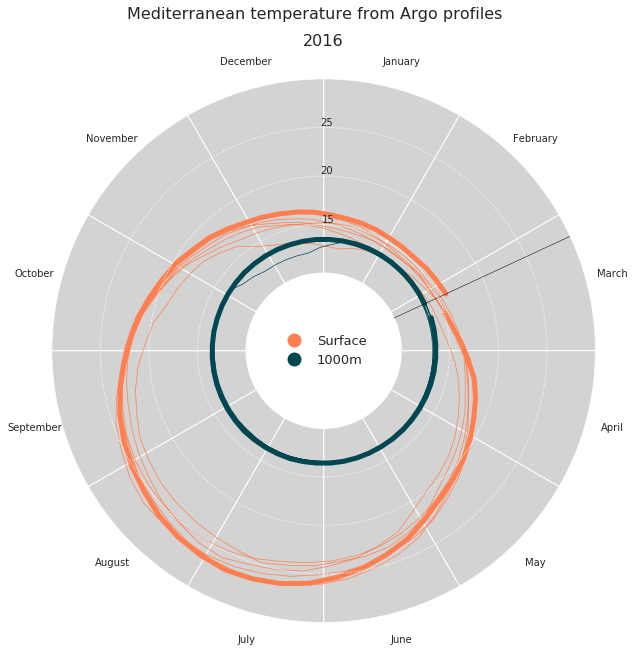

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['xtick.major.pad']='17'
plt.rcParams["axes.axisbelow"] = False
matplotlib.rc('axes',edgecolor='w')
from matplotlib.lines import Line2D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

small_angle = 0#360./25 
big_angle= (360-small_angle)/12
date_angle=((small_angle/2) + ((360-small_angle)/365)*dayoftheyear)*np.pi/180
inner=10
outer=30
ocean_color = ["#ff7f50","#004752"]

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, polar=True)
ax.set_facecolor('w')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
middles=np.arange(small_angle/2 + big_angle/2 ,360, big_angle)*np.pi/180
ax.set_xticks(middles)
ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September','October','November','December'])
ax.set_yticks([15,20,25])
ax.set_rlabel_position(359)
ax.tick_params(axis='both',color='w')
plt.grid(None,axis='x')
plt.grid(axis='y',color='w', linestyle=':', linewidth=1)
bars = ax.bar(middles, outer, width=big_angle*np.pi/180, bottom=inner, color='lightgray', edgecolor='w',zorder=0)
plt.ylim([2,outer])
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Surface', markerfacecolor=ocean_color[0], markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='1000m', markerfacecolor=ocean_color[1], markersize=15),
                   ]
ax.legend(handles=legend_elements, loc='center', fontsize=13, frameon=False)
plt.suptitle('Mediterranean temperature from Argo profiles',fontsize=16,horizontalalignment='center')

def update(i):       
    #
    ax.cla()
    #REDRAWING AXES
    ax.set_facecolor('w')
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    middles=np.arange(small_angle/2 + big_angle/2 ,360, big_angle)*np.pi/180
    ax.set_xticks(middles)
    ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September','October','November','December'])
    ax.set_yticks([15,20,25])
    ax.set_rlabel_position(359)
    ax.tick_params(axis='both',color='w')
    plt.grid(None,axis='x')
    plt.grid(axis='y',color='w', linestyle=':', linewidth=1)
    bars = ax.bar(middles, outer, width=big_angle*np.pi/180, bottom=inner, color='lightgray', edgecolor='w',zorder=0)
    plt.ylim([2,outer])
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='Surface', markerfacecolor=ocean_color[0], markersize=15),
                       Line2D([0], [0], marker='o', color='w', label='1000m', markerfacecolor=ocean_color[1], markersize=15),
                       ]
    ax.legend(handles=legend_elements, loc='center', fontsize=13, frameon=False)
    plt.suptitle('Mediterranean temperature from Argo profiles',fontsize=16,horizontalalignment='center')
    #THIS CHANGES
    i0=np.max([i-51,0])
        
    ax.plot(date_angle[i0:i+1], ndf['tsurf'][i0:i+1],'-',color=ocean_color[0],alpha=1.0,linewidth=5)     
    ax.plot(date_angle[0:i+1], ndf['tsurf'][0:i+1],'-',color=ocean_color[0],linewidth=0.7)     
    
    ax.plot(date_angle[i0:i+1], ndf['t1000'][i0:i+1],'-',color=ocean_color[1],alpha=1.0,linewidth=5)     
    ax.plot(date_angle[0:i+1], ndf['t1000'][0:i+1],'-',color=ocean_color[1],linewidth=0.7)     
    
    ax.plot([date_angle[i],date_angle[i]],[inner,outer],'k-',linewidth=0.5)
    plt.title(str(activeyear[i]),fontsize=16,horizontalalignment='center')

update(322)
#anim = FuncAnimation(fig, update, interval=40, frames=len(daterange)-1)    
#anim.save('ArgopyUseCase_MedTempAnimation.mp4')   
#HTML(anim.to_html5_video())
plt.show()
